In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd

In [56]:
path = '/content/drive/MyDrive/csv data/pp2018.csv'

In [ ]:
df = pd.read_csv(path, names = ["TID","Price","Sale Date", "Postcode",
                                    "Property Type","New Build","Tenure",
                                    "PAON","SAON","Street","Locality",
                                    "Town/City","District","County",
                                    "PPD Category","Record Status"],
                            parse_dates= ["Sale Date"])

In [ ]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


In [ ]:
df.shape

(1024432, 16)

*   We will filter the data to get all the transaction for a particular year and month ( say July 2018 for example).
*   We will only keep transactions of type "A" (Additions) in the data frame and get rid of Changes and Deletions.
*  And for the sake of simplicity we will also remove transactions for property type "O" (Other)
*   Focus only on Detached ("D"), Semi Detached ("S"), Flats ("F") and Terraced
("T") houses.

In [ ]:
# Select only record type "A" and propertyy type not "O"
df = df.loc[df['Record Status'] == 'A']
df = df.loc[df['Property Type'] != 'O']

#Select transactions for 2018
df = df[(df["Sale Date"].dt.year == 2018)]

In [ ]:
df.shape

(959003, 16)

**Step - 1 : Obtain the trend of sales volume across months**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959003 entries, 0 to 1024431
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TID            959003 non-null  object        
 1   Price          959003 non-null  int64         
 2   Sale Date      959003 non-null  datetime64[ns]
 3   Postcode       958301 non-null  object        
 4   Property Type  959003 non-null  object        
 5   New Build      959003 non-null  object        
 6   Tenure         959003 non-null  object        
 7   PAON           959003 non-null  object        
 8   SAON           127930 non-null  object        
 9   Street         945361 non-null  object        
 10  Locality       359120 non-null  object        
 11  Town/City      959003 non-null  object        
 12  District       959001 non-null  object        
 13  County         959003 non-null  object        
 14  PPD Category   959003 non-null  object        
 15  Reco

In [ ]:
# Create a variable month to denote the transaction month
# df['Month'] = df['Sale Date'].apply(lambda x: x.srfttime("%Y-%m-%d")[:7])
df['Month'] = df['Sale Date'].dt.to_period('M').astype(str)

In [ ]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A,2018-01


In [ ]:
monthly_sales_volume = df["Month"].value_counts()

In [ ]:
type(monthly_sales_volume)

pandas.core.series.Series

In [ ]:
monthly_sales_volume.sort_index(inplace=True)

In [ ]:
monthly_sales_volume

,count
Month,
2018-01,65004
2018-02,66959
2018-03,78070
2018-04,67094
2018-05,76325
2018-06,90178
2018-07,83082
2018-08,95382
2018-09,77836


In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [ ]:
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)

In [ ]:
print(type(monthly_sales_volume))
print(monthly_sales_volume.shape)

<class 'pandas.core.series.Series'>
(12,)


Text(0.5, 0, 'Month')

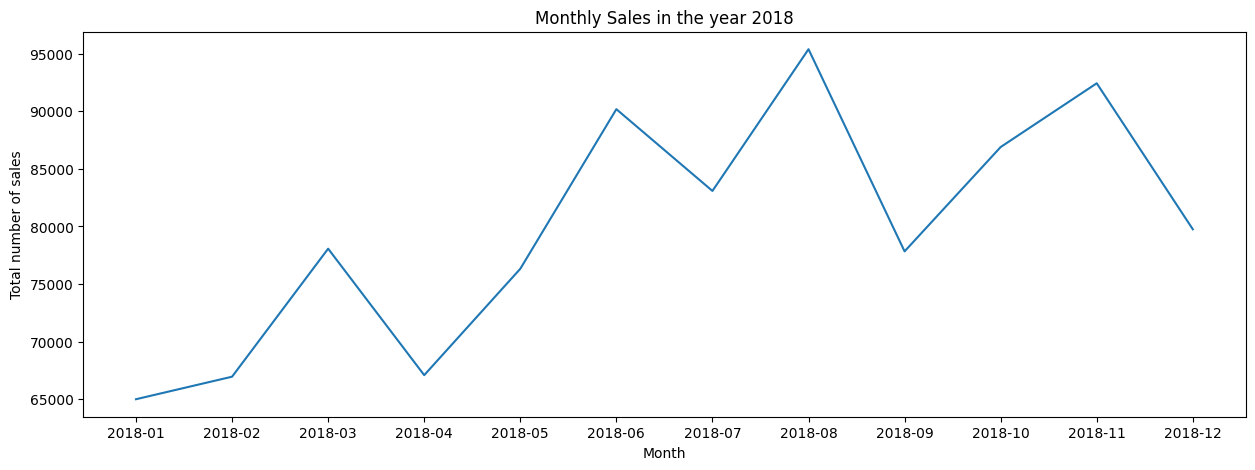

In [ ]:
# Create the plot object
plt.plot(monthly_sales_volume)

plt.title('Monthly Sales in the year 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Month')

In [ ]:
dist_data = df['District'].unique()

In [ ]:
print(dist_data)

['SHROPSHIRE' 'WREKIN' 'TAUNTON DEANE' 'NORTH SOMERSET'
 'BATH AND NORTH EAST SOMERSET' 'SEDGEMOOR' 'SOUTH SOMERSET'
 'WEST SOMERSET' 'IPSWICH' 'SUFFOLK COASTAL' 'MID SUFFOLK' 'FOREST HEATH'
 'BABERGH' 'ST EDMUNDSBURY' 'WAVENEY' 'BROMLEY' 'CROYDON' 'BEXLEY'
 'SUTTON' 'MERTON' 'KINGSTON UPON THAMES' 'LAMBETH' 'RICHMOND UPON THAMES'
 'LEWISHAM' 'GREENWICH' 'WANDSWORTH' 'HAVANT' 'EAST HAMPSHIRE' 'MENDIP'
 'EPSOM AND EWELL' 'SURREY HEATH' 'ELMBRIDGE' 'TANDRIDGE'
 'REIGATE AND BANSTEAD' 'GUILDFORD' 'WOKING' 'WAVERLEY' 'RUNNYMEDE'
 'MOLE VALLEY' 'BARNSLEY' 'ROTHERHAM' 'SHEFFIELD' 'DONCASTER' 'STOCKPORT'
 'SALFORD' 'WIGAN' 'TAMESIDE' 'MANCHESTER' 'ROCHDALE' 'TRAFFORD' 'BOLTON'
 'OLDHAM' 'SWALE' 'CANTERBURY' 'TONBRIDGE AND MALLING' 'SHEPWAY' 'ASHFORD'
 'DOVER' 'MEDWAY' 'THANET' 'TUNBRIDGE WELLS' 'MAIDSTONE' 'BURY' 'PRESTON'
 'LIVERPOOL' 'HALTON' 'BLACKPOOL' 'BURNLEY' 'MID DEVON' 'EAST DEVON'
 'TORBAY' 'TEIGNBRIDGE' 'SPELTHORNE' 'BLACKBURN WITH DARWEN' 'FYLDE'
 'SOUTH RIBBLE' 'WEST LANCASHIRE' 

 Step - 2 : Observe the daily sales volume in the monthy of July 2018

In [ ]:
# SD = df['Sale Date']
# print(SD)

In [ ]:
df = df[df['Sale Date'].dt.month == 7]

print(df.shape)

daily_sales_volume = df["Sale Date"].value_counts()

(83082, 17)


In [ ]:
daily_sales_volume

,count
Sale Date,
2018-07-27,11145
2018-07-20,8802
2018-07-06,8400
2018-07-13,6561
2018-07-31,5047
2018-07-12,3568
2018-07-30,3429
2018-07-26,2965
2018-07-02,2931


In [ ]:
daily_sales_volume.sort_index(inplace=True)

In [ ]:
daily_sales_volume

,count
Sale Date,
2018-07-01,18
2018-07-02,2931
2018-07-03,1828
2018-07-04,2064
2018-07-05,2358
2018-07-06,8400
2018-07-07,18
2018-07-08,11
2018-07-09,2259


Text(0.5, 0, 'Date')

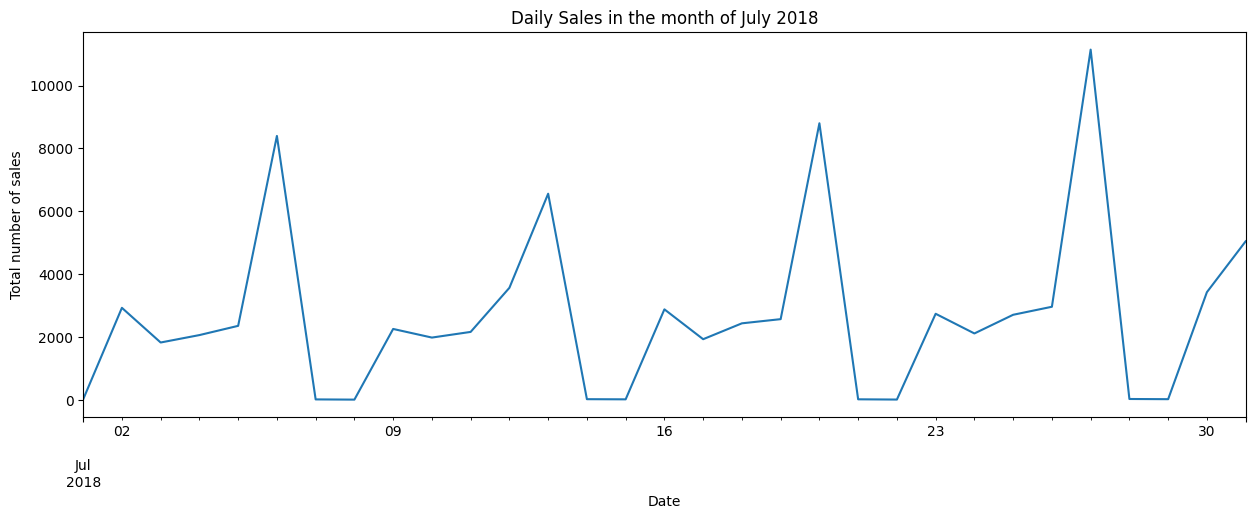

In [ ]:
# Create the plot object
daily_sales_volume.plot()

plt.title('Daily Sales in the month of July 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Date')

In [ ]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
835,{79A74E21-D135-1289-E053-6B04A8C01627},84000,2018-07-20,OL9 8LS,T,N,L,6,NaN,WHITEGATE LANE,CHADDERTON,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A,2018-07
1044,{773788C2-6D59-2CE4-E053-6C04A8C05E57},228000,2018-07-27,EX16 6AE,D,N,F,11,NaN,MERCERS CLOSE,NaN,TIVERTON,MID DEVON,DEVON,A,A,2018-07
1055,{773788C2-6D60-2CE4-E053-6C04A8C05E57},330000,2018-07-30,EX16 7BL,T,N,F,HOLLY TREE BARN,NaN,CHAINS ROAD,SAMPFORD PEVERELL,TIVERTON,MID DEVON,DEVON,A,A,2018-07
1123,{79A74E21-B602-1289-E053-6B04A8C01627},140000,2018-07-25,OL11 4DD,S,N,L,24,NaN,LINKS VIEW,NaN,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A,2018-07
1214,{79A74E21-BC74-1289-E053-6B04A8C01627},375000,2018-07-26,PR3 0ZL,D,N,F,THE COTTAGE,NaN,WEST END,GREAT ECCLESTON,PRESTON,WYRE,LANCASHIRE,A,A,2018-07


Step - 3: Comparing the daily sales volume of different property types in July

In [ ]:
daily_price = df.groupby(['Sale Date','Property Type'])['Price'].count().unstack()

In [ ]:
daily_price.columns

Index(['D', 'F', 'S', 'T'], dtype='object', name='Property Type')

In [ ]:
daily_price

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


Text(0.5, 0, 'Date')

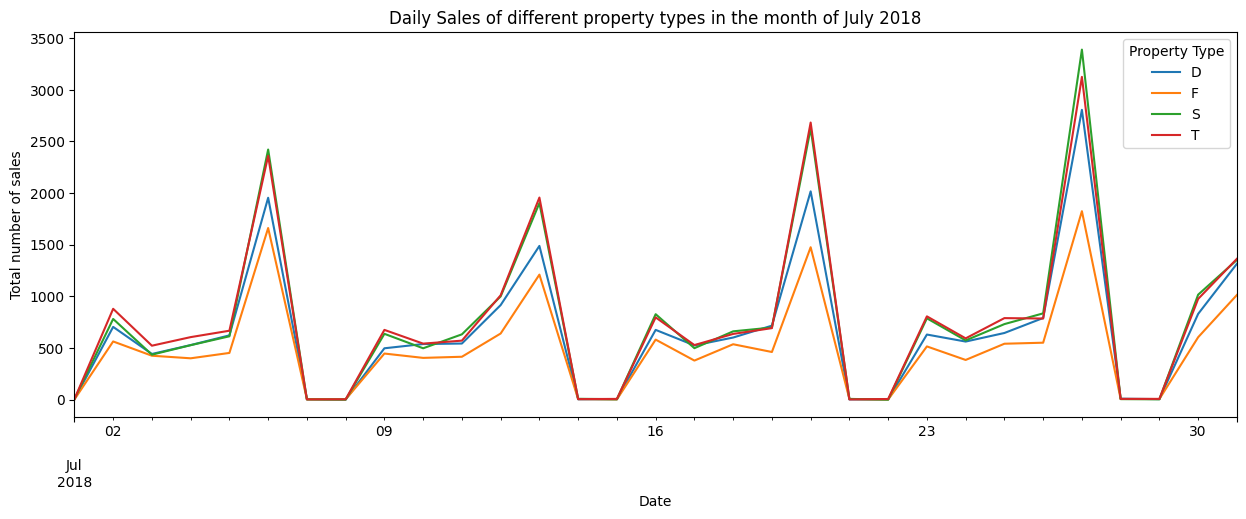

In [ ]:
daily_price.plot()

plt.title('Daily Sales of different property types in the month of July 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Date')

Step - 4: Draw coparison among different property types in term of sales

In [ ]:
# Number of residental property transactions in Aug 2018 by property type
sales_by_type = df["Property Type"].value_counts()

In [ ]:
sales_by_type

,count
Property Type,
T,23630
S,23501
D,20406
F,15545


Text(0.5, 0, 'Property Type')

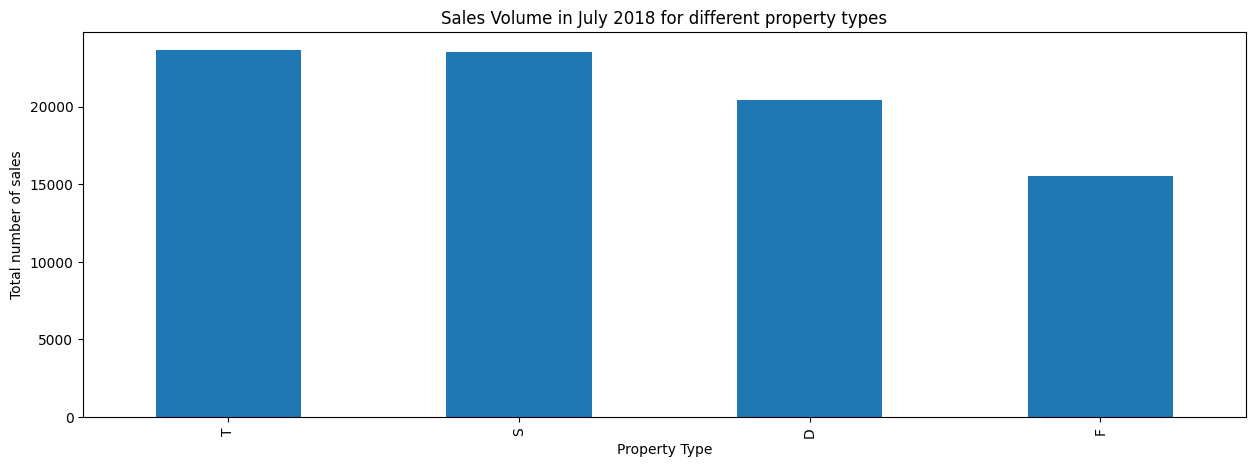

In [ ]:
# Create the plot object
sales_by_type.plot(kind = 'bar')

plt.title('Sales Volume in July 2018 for different property types')
plt.ylabel('Total number of sales')
plt.xlabel('Property Type')

Step - 5: Average house prices for different property types in July

In [ ]:
avg_price_property_type = df.groupby('Property Type')['Price'].mean()

In [ ]:
avg_price_property_type

,Price
Property Type,
D,420870.312359
F,306578.147507
S,260353.586613
T,248855.367203


Text(0, 0.5, 'Average Prices')

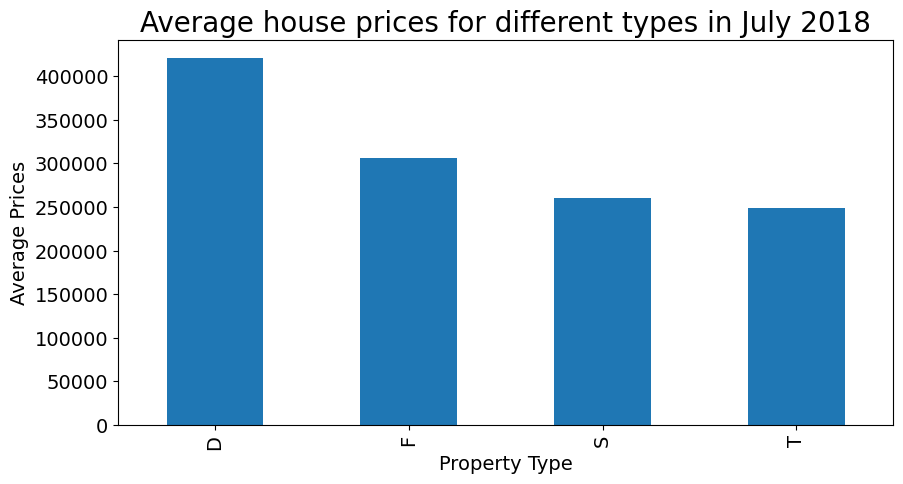

In [ ]:
# Create the instance of a figure object
ax = avg_price_property_type.plot.bar(figsize = (10, 5), fontsize = 14)

ax.set_title("Average house prices for different types in July 2018", fontsize = 20)
ax.set_xlabel("Property Type", fontsize = 14)
ax.set_ylabel("Average Prices", fontsize = 14)


Step -6: Obtain the average house price distribution for different property types

In [ ]:
df.groupby(['Sale Date','Property Type'])['Price'].mean().unstack()

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,540000.000000,109000.000000,172571.428571,217400.000000
2018-07-02,445515.668085,350084.714539,270838.773657,255916.592045
2018-07-03,447700.440181,373247.507042,247046.855505,269273.124283
2018-07-04,438009.792060,334057.576060,280296.412879,242835.457096
2018-07-05,458506.836276,333304.015453,269661.234528,245529.871257
2018-07-06,388179.344246,280558.135379,248347.932700,223573.152478
2018-07-07,383420.714286,267990.833333,157500.000000,490333.333333
2018-07-08,213500.000000,147123.750000,245000.000000,116250.000000
2018-07-09,401749.847390,301908.429530,265197.501567,291172.751479


In [ ]:
df.describe()

,Price,Sale Date
count,8.308200e+04,83082
mean,3.051571e+05,2018-07-17 09:04:12.964541184
min,1.000000e+00,2018-07-01 00:00:00
25%,1.520000e+05,2018-07-10 00:00:00
50%,2.350000e+05,2018-07-19 00:00:00
75%,3.630000e+05,2018-07-26 00:00:00
max,2.121000e+07,2018-07-31 00:00:00
std,3.309047e+05,NaN


Text(0.5, 0, 'Property Type')

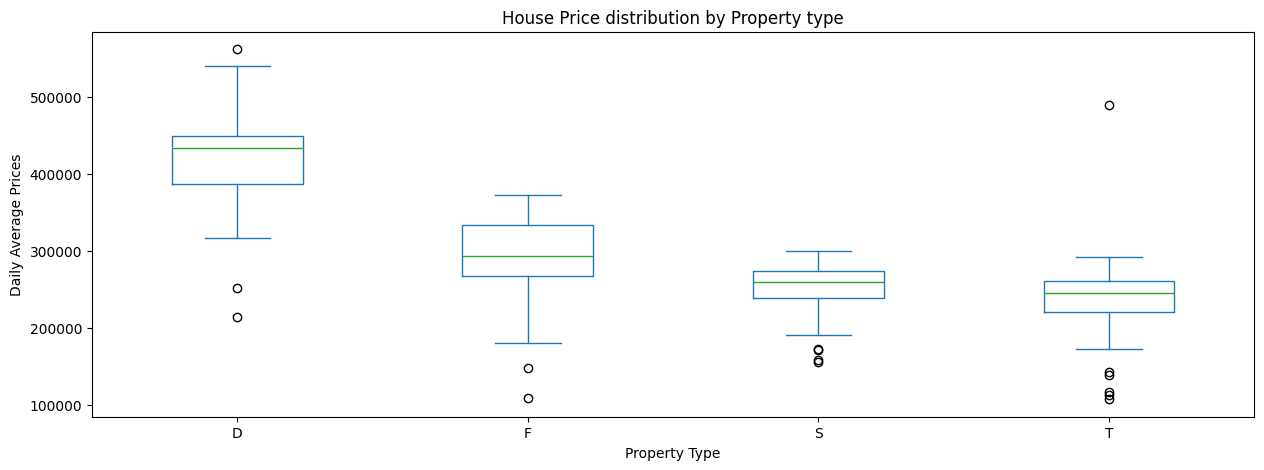

In [ ]:
 # Price distribution box plot

df.groupby(['Sale Date', 'Property Type'])['Price'].mean().unstack().plot(kind = 'box')
plt.title('House Price distribution by Property type')
plt.ylabel('Daily Average Prices')
plt.xlabel('Property Type')

Whiskers are set at 1.5 * IQR(Q3 -Q1)

The IQR (Q3 - Q1) measures the spread of the middle 50% of the data. It’s a robust measure of variability because it excludes the influence of outliers or extreme values.

Q1 (1st Quartile): The 25th percentile of the data.

Q3 (3rd Quartile): The 75th percentile of the data.

IQR: The range between Q3 and Q1, representing the "central" part of the data.

Why 1.5 is Used?
The multiplier 1.5 provides a standardized way to identify potential outliers. Here’s why:

Captures "Reasonable Spread":

Multiplying the IQR by 1.5 roughly captures the majority of typical data points in a dataset, assuming a relatively normal distribution.
For a normal distribution:
~99.3% of the data lies within

𝑄
1
−
1.5
×
IQR

𝑄
3
+
1.5
×
IQR

How It Identifies Outliers
In a box plot, the whiskers are defined as:

Lower whisker:
𝑄
1
−
1.5
×
IQR

Upper whisker:
𝑄
3
+
1.5
×
IQR

Any data point:

Less than
𝑄
1
−
1.5
×
IQR
is flagged as a low-end outlier.

Greater than
𝑄
3
+
1.5
×
IQR
is flagged as a high-end outlier.


Can We Change 1.5?
Yes, you can adjust the multiplier based on the nature of your data:

Use a larger value (e.g., 3) for datasets with higher variability or known outliers that are still valid.

Use a smaller value (e.g., 1) for datasets where precision in detecting small deviations is critical.

# **Seaborn**



In [57]:
path = '/content/drive/MyDrive/csv data/Speed Dating Data.csv'

In [58]:
speed_dating_data = pd.read_csv(path, encoding = 'unicode_escape')

In [59]:
speed_dating_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [60]:
speed_dating_data.shape

(8378, 195)

In [61]:
speed_dating_data.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

In [ ]:
for column in speed_dating_data.columns:
    print(f"Is column '{column}' a Series? ", isinstance(speed_dating_data[column], pd.Series))

Is column 'iid' a Series?  True
Is column 'id' a Series?  True
Is column 'gender' a Series?  True
Is column 'idg' a Series?  True
Is column 'condtn' a Series?  True
Is column 'wave' a Series?  True
Is column 'round' a Series?  True
Is column 'position' a Series?  True
Is column 'positin1' a Series?  True
Is column 'order' a Series?  True
Is column 'partner' a Series?  True
Is column 'pid' a Series?  True
Is column 'match' a Series?  True
Is column 'int_corr' a Series?  True
Is column 'samerace' a Series?  True
Is column 'age_o' a Series?  True
Is column 'race_o' a Series?  True
Is column 'pf_o_att' a Series?  True
Is column 'pf_o_sin' a Series?  True
Is column 'pf_o_int' a Series?  True
Is column 'pf_o_fun' a Series?  True
Is column 'pf_o_amb' a Series?  True
Is column 'pf_o_sha' a Series?  True
Is column 'dec_o' a Series?  True
Is column 'attr_o' a Series?  True
Is column 'sinc_o' a Series?  True
Is column 'intel_o' a Series?  True
Is column 'fun_o' a Series?  True
Is column 'amb_o' a

In [62]:
import numpy as np

Text(0, 0.5, 'Frequency')

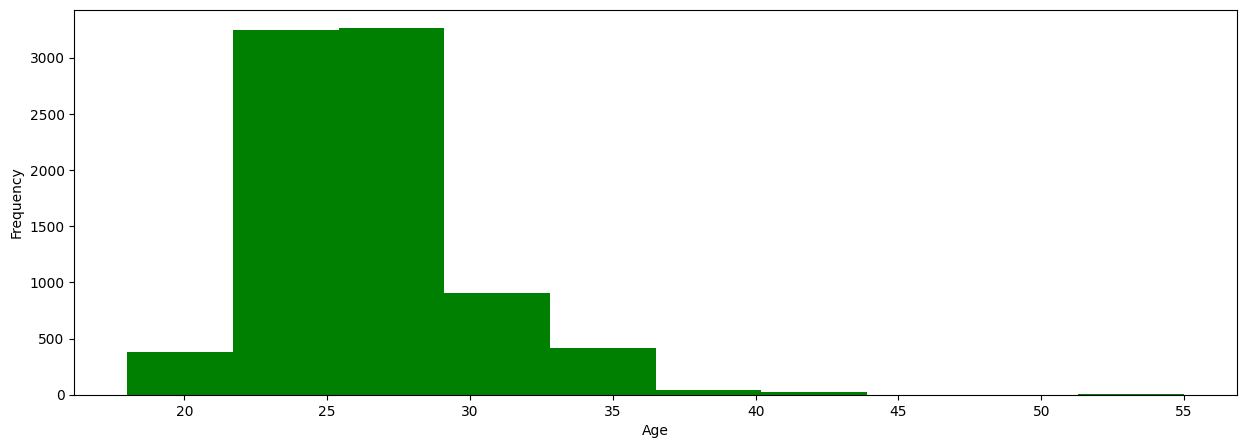

In [67]:
age = speed_dating_data[~speed_dating_data['age'].isna()]['age']
plt.hist(age.values, color = 'green')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [68]:
# speed_dating_data['age'].isna():
# This creates a boolean Series that is True where the 'age' column has missing
# (NaN) values, and False where it has non-missing values.
# ~speed_dating_data['age'].isna():

# The ~ negates the boolean values, so True becomes False (i.e., for NaN values),
# and False becomes True (i.e., for non-NaN values).
# Effectively, this produces True for non-missing values and False for
# missing values.

In [70]:
bool_series = pd.Series([True, False, True, False])

# Negating the series
negated_series = ~bool_series
print(negated_series)
# Output:
# 0    False
# 1     True
# 2    False
# 3     True

0    False
1     True
2    False
3     True
dtype: bool


In [71]:
import seaborn as sns

Text(0, 0.5, 'Frequency')

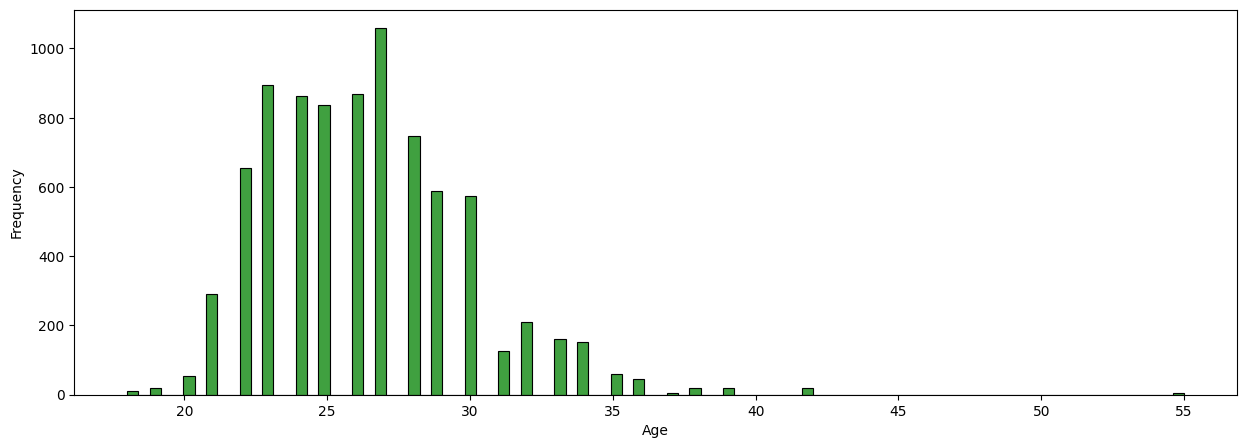

In [73]:
sns.histplot(age.values, color = 'green')
plt.xlabel('Age')
plt.ylabel('Frequency')

**Correlation** is a statistical measure that describes the relationship between two variables. It indicates how strongly and in what direction two variables are related to each other.

**Key Characteristics of Correlation**  :

**Positive Correlation**: When one variable increases, the other also increases.

**Negative Correlation**: When one variable increases, the other decreases.

**No Correlation**: There is no apparent relationship between the variables.

**Strength of Relationship**:

Correlation values range between -1 and 1:

1: Perfect positive correlation (e.g., x and x).

0: No correlation (variables are independent).

-1: Perfect negative correlation (e.g., x and -x).

**Linear Relationship**:

Correlation measures linear relationships (straight-line relationships). It does not detect non-linear relationships effectively.

**Example of Correlation**

**Positive Correlation**

**Height and Weight**: Taller people tend to weigh more.

**Negative Correlation**

**Temperature and Hot Coffee Sales**: As the temperature increases, the sales of hot coffee decrease.

**No Correlation**

**Shoe Size and IQ**: There’s no relationship between these two variables.


In [85]:
# Negatively correlated data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [11, 10, 9, 8, 7, 6, 6, 4, 3, 2]

In [86]:
df = pd.DataFrame(data={'x': x, 'y': y})

In [87]:
df

,x,y
0,1,11
1,2,10
2,3,9
3,4,8
4,5,7
5,6,6
6,7,6
7,8,4
8,9,3
9,10,2


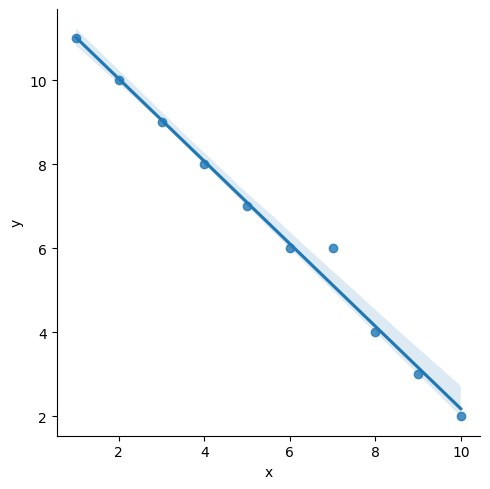

In [88]:
# iF x value increases, y value decreases
sns.lmplot(x='x', y='y', data=df)

In [89]:
df.corr()

,x,y
x,1.000000,-0.994558
y,-0.994558,1.000000


In [90]:
# Positively correlated data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 3, 4, 6, 6, 7, 8, 9, 10, 11]

In [91]:
df = pd.DataFrame(data={'x': x, 'y': y})

In [92]:
df

,x,y
0,1,2
1,2,3
2,3,4
3,4,6
4,5,6
5,6,7
6,7,8
7,8,9
8,9,10
9,10,11


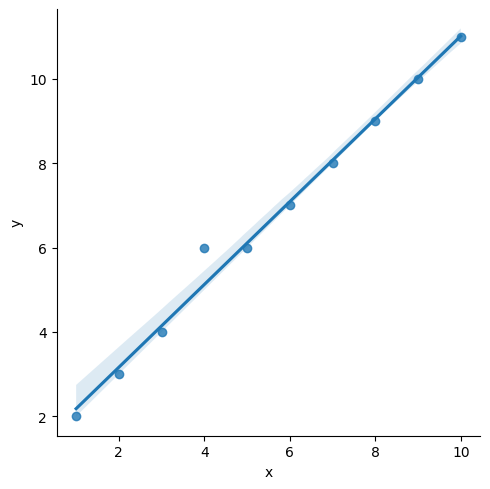

In [93]:
# iF x value increases, y value increases
sns.lmplot(x='x', y='y', data=df)

In [94]:
df.corr()

,x,y
x,1.000000,0.994558
y,0.994558,1.000000


In [96]:
speed_dating_data_df = speed_dating_data[['gender', 'shopping', 'gaming', 'concerts', 'music']]

In [97]:
corr_df = speed_dating_data_df.corr()

In [98]:
corr_df

,gender,shopping,gaming,concerts,music
gender,1.000000,-0.330718,0.219619,-0.128339,-0.076850
shopping,-0.330718,1.000000,0.093467,0.205389,0.208329
gaming,0.219619,0.093467,1.000000,0.098806,0.043301
concerts,-0.128339,0.205389,0.098806,1.000000,0.655728
music,-0.076850,0.208329,0.043301,0.655728,1.000000


<Axes: >

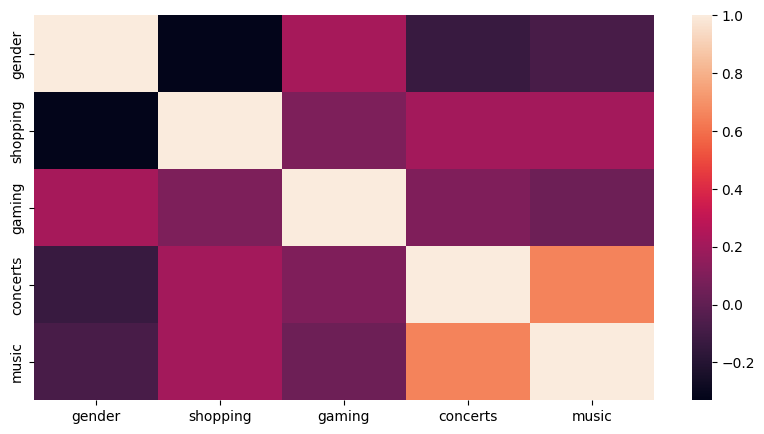

In [99]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

<Axes: >

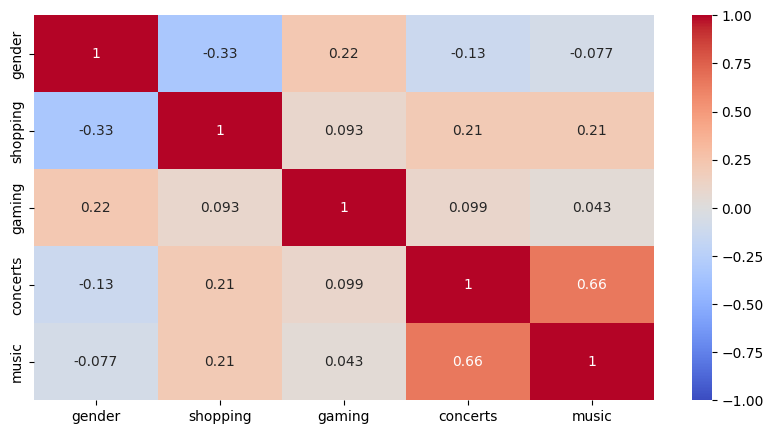

In [100]:
plt.figure(figsize=(10,5))
sns.heatmap(speed_dating_data_df.corr(), vmin=-1, cmap='coolwarm', annot=True)

# **Two-way Plots**

In [101]:
speed_dating_data_df.head()

,gender,shopping,gaming,concerts,music
0,0,8.0,1.0,10.0,9.0
1,0,8.0,1.0,10.0,9.0
2,0,8.0,1.0,10.0,9.0
3,0,8.0,1.0,10.0,9.0
4,0,8.0,1.0,10.0,9.0


In [102]:
speed_dating_data_df.shape


(8378, 5)

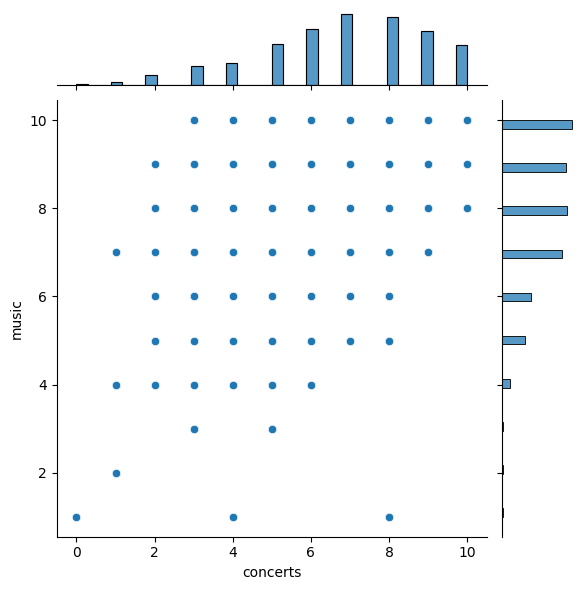

In [104]:
sns.jointplot(x='concerts', y='music', data = speed_dating_data_df)

In [105]:
speed_dating_data_df[(speed_dating_data_df['concerts'] == 6) & (speed_dating_data_df['music'] == 8)]

,gender,shopping,gaming,concerts,music
130,1,6.0,8.0,6.0,8.0
131,1,6.0,8.0,6.0,8.0
132,1,6.0,8.0,6.0,8.0
133,1,6.0,8.0,6.0,8.0
134,1,6.0,8.0,6.0,8.0
...,...,...,...,...,...
7801,0,4.0,5.0,6.0,8.0
7802,0,4.0,5.0,6.0,8.0
7803,0,4.0,5.0,6.0,8.0
7804,0,4.0,5.0,6.0,8.0
